___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import tensorflow as tf
import os

# Note that the `tpu` argument is for Colab-only
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [4]:
# !pip install matplotlib==3.4

In [5]:
strategy = tf.distribute.TPUStrategy(resolver)
# tpu'yu kullanmak için

In [6]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from warnings import filterwarnings
filterwarnings('ignore')
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NLP/Proje/Womens Clothing E-Commerce Reviews.csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


### Data Wrangling

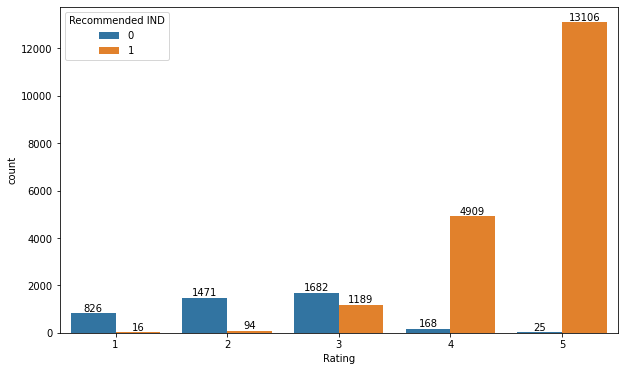

In [12]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x="Rating", data=df, hue = "Recommended IND")
for p in ax.containers:
    ax.bar_label(p)

In [13]:
df["Recommended IND"].unique()


array([1, 0])

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

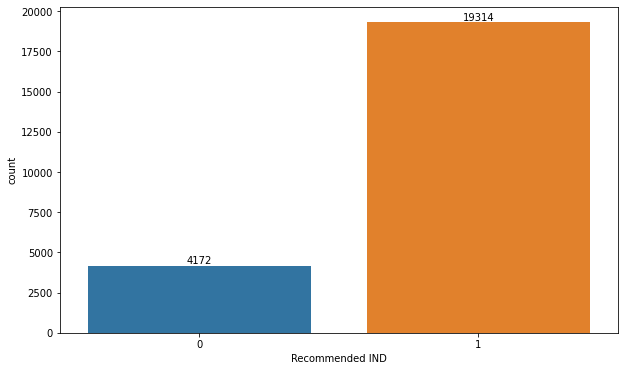

In [15]:
plt.fig = plt.figure(figsize = (10,6))
ax = sns.countplot(x="Recommended IND", data=df)
ax.bar_label(ax.containers[0]);

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [16]:
df.rename(columns={"Review Text":"text", "Recommended IND":"label"}, inplace=True) 

In [18]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'text', 'Rating', 'label',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name'],
      dtype='object')

---
---


In [19]:
df=df[['text','label']]
df.head()

,text,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


### Missing Value Detection

In [20]:
df.isnull().sum()


text     845
label      0
dtype: int64

In [21]:
df.dropna(inplace = True) 
df.reset_index(drop=True, inplace=True)
df

,text,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
...,...,...
22636,I was very happy to snag this dress at such a ...,1
22637,"It reminds me of maternity clothes. soft, stre...",1
22638,"This fit well, but the top was very see throug...",0
22639,I bought this dress for a wedding i have this ...,1


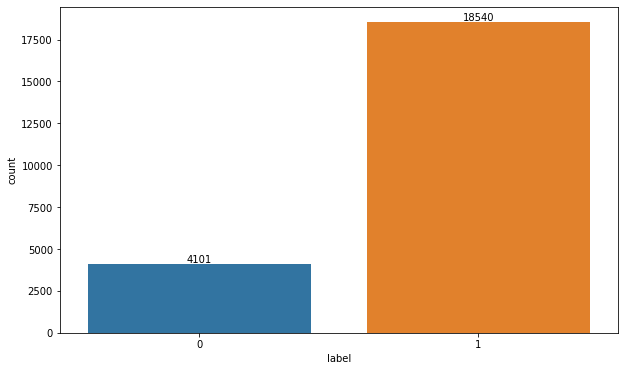

In [22]:
plt.fig = plt.figure(figsize = (10,6))
ax = sns.countplot(x="label", data=df)
ax.bar_label(ax.containers[0]);

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [26]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [30]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [32]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [34]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [27]:
stop_words = stopwords.words('english')

In [28]:
def cleaning(data):
    
    #1. Tokenize
    text_tokens = word_tokenize(data.replace("'", "").lower()) 
    
    #2. Remove Puncs and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]  # noktalama işaretlerini çıkartıyoruz
    
    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words] # stop word'ler
    
    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw] # tokenleri sözlükte karşılığa olacak tokenlerine indirgiyoruz
    
    #joining
    return " ".join(text_cleaned) #  joinle birleştiriyoruz

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [35]:
positive_sentences = df[df["label"] == 1]["text"]
positive_sentences = positive_sentences.apply(cleaning)
positive_sentences

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store im ...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
6        aded basket hte last mintue see would look lik...
                               ...                        
22635    wasnt sure ordering skirt couldnt see person f...
22636    happy snag dress great price easy slip flatter...
22637    reminds maternity clothes soft stretchy shiny ...
22639    bought dress wedding summer cute unfortunately...
22640    dress lovely platinum feminine fit perfectly e...
Name: text, Length: 18540, dtype: object

In [36]:
negative_sentences = df[df["label"] == 0]["text"]
negative_sentences = negative_sentences.apply(cleaning)
negative_sentences

2        high hope dress really wanted work initially o...
5        love tracy reese dress one petite foot tall us...
10       dress run small esp zipper area run ordered sp...
22       first pullover styling side zipper wouldnt pur...
25       loved material didnt really look long dress pu...
                               ...                        
22606    tried color really pretty fun donset want pair...
22607    wanted love jacket soft great color unfortunat...
22617    purchased good price typically love maeve fabr...
22634    surprised positive review product terrible cut...
22638    fit well top see never would worked im glad ab...
Name: text, Length: 4101, dtype: object

### Collect Words (positive and negative separately)

In [37]:
positive_words = " ".join(positive_sentences)
positive_words[:100]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc ne'

In [38]:
negative_words = " ".join(negative_sentences)
negative_words[:100]

'high hope dress really wanted work initially ordered petite small usual size found outrageously smal'

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [39]:
from wordcloud import WordCloud


In [40]:
wordcloud_positive = WordCloud(background_color="white", max_words =250)


In [41]:
wordcloud_positive.generate(positive_words)


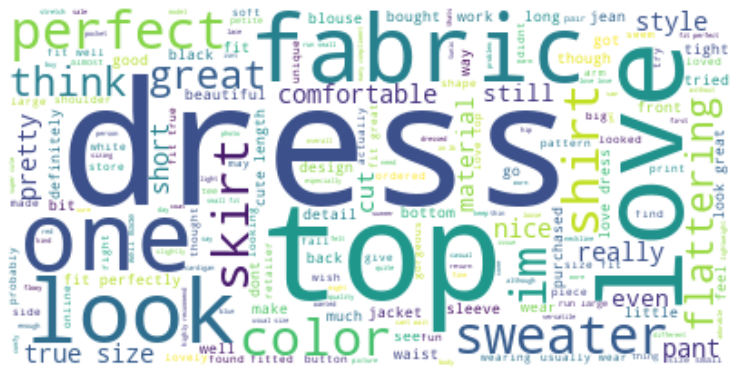

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13,13))
plt.imshow(wordcloud_positive, interpolation="bilinear",) # interpolation=colour
plt.axis("off")
plt.show()

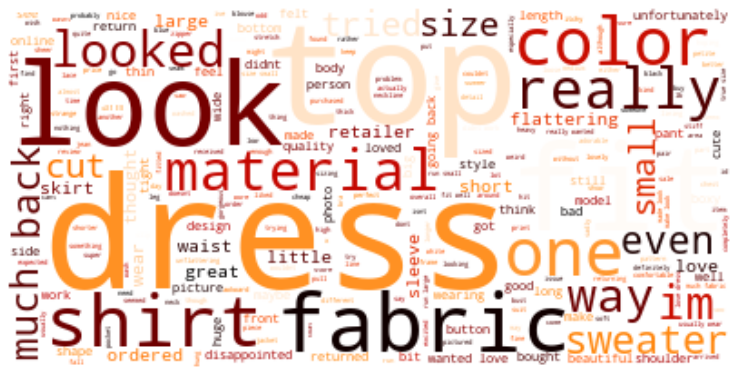

In [43]:
wordcloud_negative = WordCloud(background_color="white", max_words=250, colormap='gist_heat')

wordcloud_negative.generate(negative_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [44]:
from sklearn.model_selection import train_test_split


In [45]:
X = df["text"].values
y = df["label"].map({0:1, 1:0}).values

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)


In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [47]:
from sklearn.feature_extraction.text import CountVectorizer


In [48]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3) 
X_train_count = vectorizer.fit_transform(X_train) 
X_test_count = vectorizer.transform(X_test) 

In [49]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [50]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())


,ab,abby,abdomen,ability,able,abo,absolute,absolutely,abstract,absurd,...,zero,zig,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18110,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [52]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [53]:
X_train_tf_idf.toarray()


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.29289995],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [54]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())


,ab,abby,abdomen,ability,able,abo,absolute,absolutely,abstract,absurd,...,zero,zig,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2929
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.154110,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
18108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
18109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
18110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.324003,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000


In [55]:
from sklearn.metrics import confusion_matrix,classification_report, f1_score, recall_score, accuracy_score, precision_score


In [56]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))  

## Logistic Regression

### CountVectorizer

In [57]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C =0.01, max_iter=1000, class_weight= "balanced", random_state=101)
log.fit(X_train_count,y_train) # grid search yerine manuel bir oynandı

LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [58]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[3141  568]
 [ 120  700]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      3709
           1       0.55      0.85      0.67       820

    accuracy                           0.85      4529
   macro avg       0.76      0.85      0.79      4529
weighted avg       0.89      0.85      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     14831
           1       0.57      0.88      0.69      3281

    accuracy                           0.86     18112
   macro avg       0.77      0.87      0.80     18112
weighted avg       0.90      0.86      0.87     18112



In [59]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-1': make_scorer(precision_score, pos_label=1),
            'recall-1': make_scorer(recall_score, pos_label=1),
            'f1-1': make_scorer(f1_score, pos_label=1)}

model = LogisticRegression(C =0.01, max_iter=1000, class_weight= "balanced", random_state=101)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy       0.844137
test_precision-1    0.545675
test_recall-1       0.837551
test_f1-1           0.660716
dtype: float64

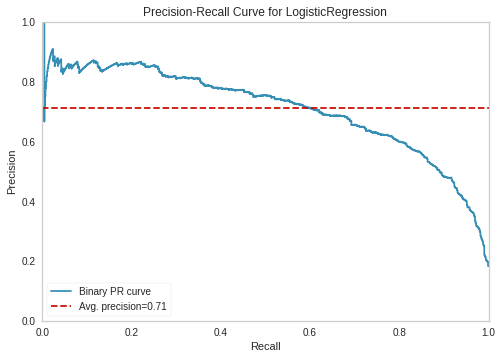

In [60]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(
    LogisticRegression(C =0.01, max_iter=1000, class_weight= "balanced", random_state=101),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [61]:
y_pred = log.predict(X_test_count)
log_AP_count = viz.score_ # 0.76 (avg precision)
log_count_rec = recall_score(y_test, y_pred)
log_count_f1 = f1_score(y_test,y_pred)
# ilerde karşılaştırma yapmak için bu şekilde atama yapıyoruz.

### TF-IDF

In [62]:
log = LogisticRegression(C=0.06, max_iter=1000, random_state=101, class_weight="balanced")
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.06, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [63]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL
[[3096  613]
 [ 114  706]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      3709
           1       0.54      0.86      0.66       820

    accuracy                           0.84      4529
   macro avg       0.75      0.85      0.78      4529
weighted avg       0.89      0.84      0.85      4529

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.84      0.90     14831
           1       0.56      0.88      0.68      3281

    accuracy                           0.85     18112
   macro avg       0.76      0.86      0.79     18112
weighted avg       0.89      0.85      0.86     18112



In [64]:
model = LogisticRegression(C=0.06, max_iter=1000, random_state=101, class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy       0.841321
test_precision-1    0.539104
test_recall-1       0.856446
test_f1-1           0.661630
dtype: float64

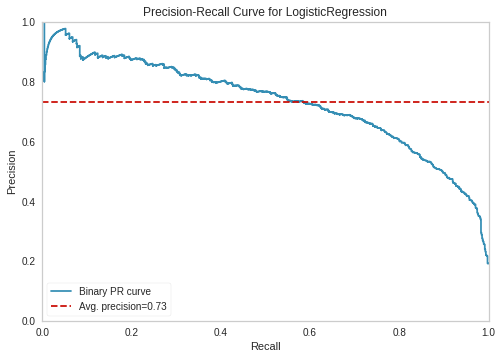

In [65]:
viz = PrecisionRecallCurve(
    LogisticRegression(C=0.06, max_iter=1000, random_state=101, class_weight="balanced"),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [66]:
y_pred = log.predict(X_test_tf_idf)
log_AP_tfidf = viz.score_
log_tfidf_rec = recall_score(y_test, y_pred)
log_tfidf_f1 = f1_score(y_test,y_pred)

## Naive Bayes 

### Countvectorizer

In [67]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb = MultinomialNB(alpha=0.7) # alpha default = 0.1 
nb.fit(X_train_count,y_train)

MultinomialNB(alpha=0.7)

In [68]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

NB MODEL
[[3369  340]
 [ 185  635]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      3709
           1       0.65      0.77      0.71       820

    accuracy                           0.88      4529
   macro avg       0.80      0.84      0.82      4529
weighted avg       0.89      0.88      0.89      4529

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     14831
           1       0.69      0.82      0.75      3281

    accuracy                           0.90     18112
   macro avg       0.83      0.87      0.85     18112
weighted avg       0.91      0.90      0.90     18112



In [69]:
model = MultinomialNB(alpha=0.7)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy       0.880300
test_precision-1    0.644797
test_recall-1       0.755860
test_f1-1           0.695832
dtype: float64

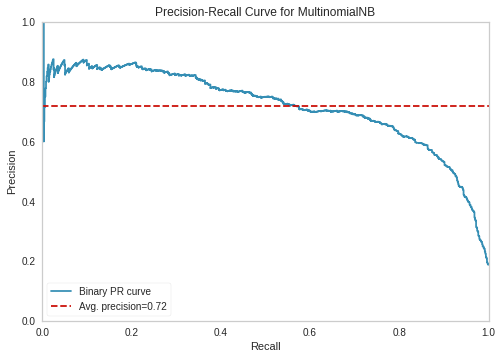

In [70]:
viz = PrecisionRecallCurve(
    MultinomialNB(alpha=0.7),
    classes=nb.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [71]:
y_pred = nb.predict(X_test_count)
nb_AP_count = viz.score_
nb_count_rec = recall_score(y_test, y_pred)
nb_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [72]:
nb = BernoulliNB(alpha=0.6)
nb.fit(X_train_tf_idf,y_train)

BernoulliNB(alpha=0.6)

In [73]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
[[3377  332]
 [ 204  616]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      3709
           1       0.65      0.75      0.70       820

    accuracy                           0.88      4529
   macro avg       0.80      0.83      0.81      4529
weighted avg       0.89      0.88      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     14831
           1       0.69      0.81      0.74      3281

    accuracy                           0.90     18112
   macro avg       0.82      0.87      0.84     18112
weighted avg       0.91      0.90      0.90     18112



In [74]:
model = BernoulliNB(alpha=0.6)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy       0.876656
test_precision-1    0.636748
test_recall-1       0.743364
test_f1-1           0.685809
dtype: float64

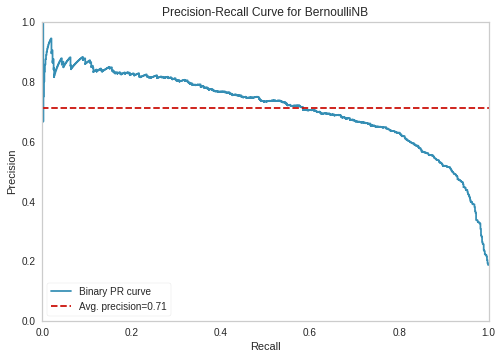

In [75]:
viz = PrecisionRecallCurve(
    BernoulliNB(alpha=0.6),
    classes=nb.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [76]:
y_pred = nb.predict(X_test_tf_idf)
nb_AP_tfidf = viz.score_
nb_tfidf_rec = recall_score(y_test, y_pred)
nb_tfidf_f1 = f1_score(y_test,y_pred)

## Support Vector Machine (SVM)

### Countvectorizer

In [77]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.001, class_weight="balanced", random_state=101)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.001, class_weight='balanced', random_state=101)

In [78]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[3140  569]
 [ 116  704]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      3709
           1       0.55      0.86      0.67       820

    accuracy                           0.85      4529
   macro avg       0.76      0.85      0.79      4529
weighted avg       0.89      0.85      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     14831
           1       0.57      0.88      0.69      3281

    accuracy                           0.86     18112
   macro avg       0.77      0.87      0.80     18112
weighted avg       0.90      0.86      0.87     18112



In [79]:
model = LinearSVC(C=0.001, class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy       0.845076
test_precision-1    0.547358
test_recall-1       0.840904
test_f1-1           0.662947
dtype: float64

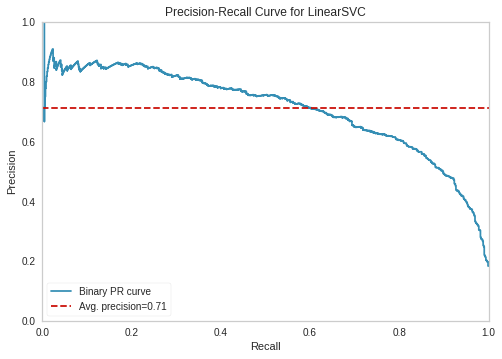

In [80]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.001, class_weight="balanced", random_state=101),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [81]:
y_pred = svc.predict(X_test_count)
svc_AP_count = viz.score_
svc_count_rec = recall_score(y_test, y_pred)
svc_count_f1 = f1_score(y_test,y_pred)

### TD-IDF

In [82]:
svc = LinearSVC(C=0.03, class_weight="balanced", random_state=101)
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.03, class_weight='balanced', random_state=101)

In [83]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[3153  556]
 [ 105  715]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      3709
           1       0.56      0.87      0.68       820

    accuracy                           0.85      4529
   macro avg       0.77      0.86      0.79      4529
weighted avg       0.89      0.85      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     14831
           1       0.60      0.91      0.73      3281

    accuracy                           0.88     18112
   macro avg       0.79      0.89      0.82     18112
weighted avg       0.91      0.88      0.88     18112



In [84]:
model = LinearSVC(C=0.03, class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy       0.856394
test_precision-1    0.568993
test_recall-1       0.856753
test_f1-1           0.683723
dtype: float64

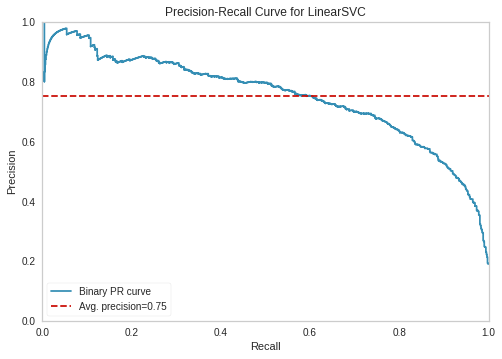

In [85]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.03, class_weight="balanced", random_state=101),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [86]:
y_pred = svc.predict(X_test_tf_idf)
svc_AP_tfidf = viz.score_
svc_tfidf_rec = recall_score(y_test, y_pred)
svc_tfidf_f1 = f1_score(y_test,y_pred)

## Random Forest

### Countvectorizer

In [87]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(100, max_depth = 9, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=9, n_jobs=-1,
                       random_state=42)

In [88]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[3168  541]
 [ 172  648]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      3709
           1       0.54      0.79      0.65       820

    accuracy                           0.84      4529
   macro avg       0.75      0.82      0.77      4529
weighted avg       0.88      0.84      0.85      4529

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.87      0.91     14831
           1       0.59      0.86      0.70      3281

    accuracy                           0.87     18112
   macro avg       0.78      0.87      0.81     18112
weighted avg       0.90      0.87      0.88     18112



In [89]:
model = RandomForestClassifier(100, max_depth = 9, random_state = 42, n_jobs = -1, class_weight="balanced")
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy       0.835358
test_precision-1    0.530767
test_recall-1       0.790310
test_f1-1           0.634880
dtype: float64

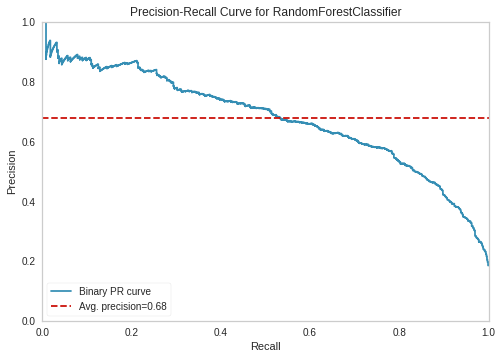

In [90]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth = 9, random_state = 42, n_jobs = -1, class_weight="balanced"),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [91]:
y_pred = rf.predict(X_test_count)
rf_AP_count = viz.score_
rf_count_rec = recall_score(y_test, y_pred)
rf_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [92]:
rf = RandomForestClassifier(100, max_depth = 9, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=9, n_jobs=-1,
                       random_state=42)

In [93]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[3134  575]
 [ 173  647]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      3709
           1       0.53      0.79      0.63       820

    accuracy                           0.83      4529
   macro avg       0.74      0.82      0.76      4529
weighted avg       0.87      0.83      0.85      4529

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     14831
           1       0.59      0.87      0.70      3281

    accuracy                           0.87     18112
   macro avg       0.78      0.87      0.81     18112
weighted avg       0.90      0.87      0.87     18112



In [94]:
model = RandomForestClassifier(100, max_depth = 9, random_state = 42, n_jobs = -1, class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy       0.828898
test_precision-1    0.518599
test_recall-1       0.784211
test_f1-1           0.624244
dtype: float64

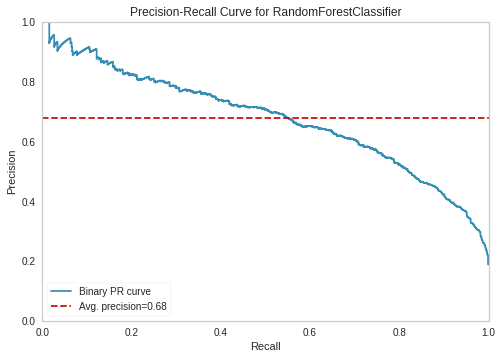

In [95]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth = 9, random_state = 42, n_jobs = -1, class_weight="balanced"),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [96]:
y_pred = rf.predict(X_test_tf_idf)
rf_AP_tfidf = viz.score_
rf_tfidf_rec = recall_score(y_test, y_pred)
rf_tfidf_f1 = f1_score(y_test,y_pred)

## Ada Boosting

### Countvectorizer

In [97]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42, learning_rate=0.8)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(learning_rate=0.8, n_estimators=500, random_state=42)

In [98]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[3527  182]
 [ 353  467]]
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      3709
           1       0.72      0.57      0.64       820

    accuracy                           0.88      4529
   macro avg       0.81      0.76      0.78      4529
weighted avg       0.87      0.88      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     14831
           1       0.81      0.63      0.71      3281

    accuracy                           0.91     18112
   macro avg       0.87      0.80      0.83     18112
weighted avg       0.90      0.91      0.90     18112



In [99]:
model = AdaBoostClassifier(n_estimators= 500, random_state = 42, learning_rate=0.8)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy       0.878865
test_precision-1    0.717425
test_recall-1       0.547700
test_f1-1           0.620924
dtype: float64

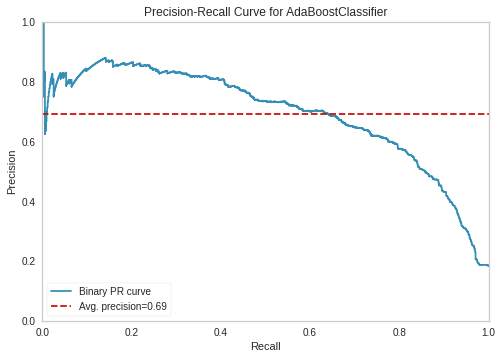

In [100]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 500, random_state = 42, learning_rate=0.8),
    classes=ada.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [101]:
y_pred = ada.predict(X_test_count)
ada_AP_count = viz.score_
ada_count_rec = recall_score(y_test, y_pred)
ada_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [102]:
ada = AdaBoostClassifier(n_estimators= 200, random_state = 42, learning_rate=0.8)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(learning_rate=0.8, n_estimators=200, random_state=42)

In [103]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[3532  177]
 [ 392  428]]
Test_Set
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      3709
           1       0.71      0.52      0.60       820

    accuracy                           0.87      4529
   macro avg       0.80      0.74      0.76      4529
weighted avg       0.87      0.87      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.91      0.96      0.94     14831
           1       0.78      0.59      0.67      3281

    accuracy                           0.90     18112
   macro avg       0.85      0.77      0.80     18112
weighted avg       0.89      0.90      0.89     18112



In [104]:
model = AdaBoostClassifier(n_estimators= 200, random_state = 42, learning_rate=0.8)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy       0.875608
test_precision-1    0.714964
test_recall-1       0.522408
test_f1-1           0.603324
dtype: float64

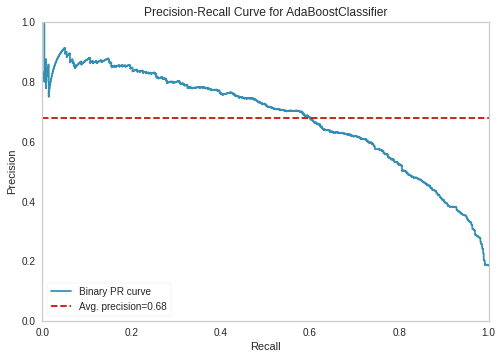

In [105]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 200, random_state = 42, learning_rate=0.8),
    classes=ada.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [106]:
y_pred = ada.predict(X_test_tf_idf)
ada_AP_tfidf = viz.score_
ada_tfidf_rec = recall_score(y_test, y_pred)
ada_tfidf_f1 = f1_score(y_test,y_pred)

## DL modeling

In [107]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [108]:
df


,text,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
...,...,...
22636,I was very happy to snag this dress at such a ...,1
22637,"It reminds me of maternity clothes. soft, stre...",1
22638,"This fit well, but the top was very see throug...",0
22639,I bought this dress for a wedding i have this ...,1


In [109]:
df.shape


(22641, 2)

### Tokenization

In [110]:
num_words = 15000 # corpusta geçen en fazla kullanılan ilk 15.000 kelimeyi(tokeni) alacağız gerisini yok sayacağız. 
# None değeri atanırsa tüm kelimeler dikkate alınır.
tokenizer = Tokenizer(num_words=num_words) #filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890' 
# filters'ın default halinde sayılar yok, eğer biz sayıları da silmek istersek bunları ekleyebiliriz ve tokenizer'ın içine ekleriz.


In [111]:
tokenizer.fit_on_texts(X) # tokenizer'ı uyguladık.


### Creating word index

In [112]:
tokenizer.word_index
# DL'de GRU ve LSTM stopwordsleri hallediyor o yüzden biz burda atmadık onu. Ama atarak da denenebili

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'was': 15,
 'so': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'fit': 26,
 'are': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'me': 31,
 'wear': 32,
 "it's": 33,
 'great': 34,
 'too': 35,
 "i'm": 36,
 'or': 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'would': 41,
 'they': 42,
 'up': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'if': 49,
 'more': 50,
 'really': 51,
 'ordered': 52,
 'little': 53,
 'perfect': 54,
 'will': 55,
 'one': 56,
 'these': 57,
 'flattering': 58,
 'well': 59,
 'an': 60,
 'soft': 61,
 'out': 62,
 'back': 63,
 'because': 64,
 'had': 65,
 'can': 66,
 '\r': 67,
 'comfortable': 68,
 'cute': 69,
 'nice': 70,
 'than': 71,
 'bought': 72,
 'beautiful': 73,
 'when': 74,
 'all': 75,
 'looks': 76,
 'bit': 77,
 'fits': 78,
 'large': 79,

In [113]:
len(tokenizer.word_index)


14847

### Converting tokens to numeric

In [114]:
X_num_tokens = tokenizer.texts_to_sequences(X) # textleri numericlere dönüştürüyoruz.


In [115]:
X[100]


"The fabric felt cheap and i didn't find it to be a flattering top. for reference i am wearing a medium in the photos and my measurements are 38-30-40."

In [116]:
print(X_num_tokens[100])


[1, 45, 267, 489, 3, 2, 124, 221, 5, 8, 29, 4, 58, 25, 12, 330, 2, 38, 141, 4, 97, 9, 1, 451, 3, 17, 1506, 27, 920, 691, 927]


### Maximum number of tokens for all documents¶

In [117]:
len(X_num_tokens[100])


31

In [118]:
len(X_num_tokens[150])


41

In [119]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens) # list olunca bunları uygulayamıyoruz bu yüzden array'e çevirdik.

In [120]:
num_tokens.mean()

60.60699615741354

In [121]:
num_tokens.max()

116

In [122]:
num_tokens.argmax()

16263

In [123]:
X[16263]

"I love maeve tops. i love the material and feel of this brand. when i saw the new tops that came out i ran to my local store to try one on. i'm usually a large in a top, once in a while an xl. they only had a large to try so i tried it in the black motif.\ni could barely get the top on. it looked like i was missing 1/2 of the top. i doubled checked the size and it was a large.\nit's a shame, the top is really cute. if you are the least bit broad or busty, go up a size or two. if you are usually a"

In [124]:
max_tokens = 116

In [125]:
sum(num_tokens <= max_tokens) / len(num_tokens)

1.0

### Fixing token counts of all documents (pad_sequences)

In [126]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)


In [127]:
X_pad.shape

(22641, 116)

In [128]:
np.array(X_num_tokens[500])

array([   2,  171,  196,    7,  170,  931,   44,    1,  106,    3,    5,
        124,   48,   23,   69,    2,  196,    5,  498,   11,  158,   16,
          2,  341,    8,  179,    5,   11,   36,   16,  314,    2,  131,
          1,  672,  462,   83,    6,   16,   61,    2,   24,  652,  200,
          3,    7,  170,  131,   19, 8659,   17,  194,   44,   75,    5,
          6,   23,   68,    2,   72,    1, 1207,   46,    3,   15,   23,
        531,   44,  167,  542,    5,   15,    1,  135,   27,    4,  507,
         77,   90,   10,    1,  462, 1524,  420,   89,   60,  601, 1197,
         16,    5,   66,   29, 2309,   43,   19,  224,   49,    1, 5773,
         46, 1126,  166,   35,   46,   37,   49,    1])

In [129]:
X_pad[500]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    2,  171,
        196,    7,  170,  931,   44,    1,  106,    3,    5,  124,   48,
         23,   69,    2,  196,    5,  498,   11,  158,   16,    2,  341,
          8,  179,    5,   11,   36,   16,  314,    2,  131,    1,  672,
        462,   83,    6,   16,   61,    2,   24,  652,  200,    3,    7,
        170,  131,   19, 8659,   17,  194,   44,   75,    5,    6,   23,
         68,    2,   72,    1, 1207,   46,    3,   15,   23,  531,   44,
        167,  542,    5,   15,    1,  135,   27,    4,  507,   77,   90,
         10,    1,  462, 1524,  420,   89,   60,  601, 1197,   16,    5,
         66,   29, 2309,   43,   19,  224,   49,    1, 5773,   46, 1126,
        166,   35,   46,   37,   49,    1], dtype=int32)

In [130]:
np.array(X_num_tokens[16263])

array([   2,   21,  771,  218,    2,   21,    1,   83,    3,  145,   13,
          7,  480,   74,    2,  196,    1,  447,  218,   20,  364,   62,
          2,  516,    8,   17,  494,  106,    8,  179,   56,   11,   36,
        107,    4,   79,    9,    4,   25,  425,    9,    4,  247,   60,
        418,   42,  117,   65,    4,   79,    8,  179,   16,    2,  104,
          5,    9,    1,  123,  791,    2,  118,  778,  115,    1,   25,
         11,    5,  157,   28,    2,   15, 1609,  504,  160,   13,    1,
         25,    2, 4114, 1777,    1,   22,    3,    5,   15,    4,   79,
         33,    4, 1376,    1,   25,    6,   51,   69,   49,   40,   27,
          1,  502,   77,  652,   37,  583,  147,   43,    4,   22,   37,
        262,   49,   40,   27,  107,    4])

In [131]:
X_pad[16263]

array([   2,   21,  771,  218,    2,   21,    1,   83,    3,  145,   13,
          7,  480,   74,    2,  196,    1,  447,  218,   20,  364,   62,
          2,  516,    8,   17,  494,  106,    8,  179,   56,   11,   36,
        107,    4,   79,    9,    4,   25,  425,    9,    4,  247,   60,
        418,   42,  117,   65,    4,   79,    8,  179,   16,    2,  104,
          5,    9,    1,  123,  791,    2,  118,  778,  115,    1,   25,
         11,    5,  157,   28,    2,   15, 1609,  504,  160,   13,    1,
         25,    2, 4114, 1777,    1,   22,    3,    5,   15,    4,   79,
         33,    4, 1376,    1,   25,    6,   51,   69,   49,   40,   27,
          1,  502,   77,  652,   37,  583,  147,   43,    4,   22,   37,
        262,   49,   40,   27,  107,    4], dtype=int32)

### Train Set Split

In [132]:
from sklearn.model_selection import train_test_split


In [133]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.1, stratify=y, random_state=101)

### Modeling

In [134]:
model = Sequential()


In [135]:
embedding_size = 50

In [136]:
model.add(Embedding(input_dim=num_words, 
                    output_dim=embedding_size, 
                    input_length=max_tokens)) 


model.add(GRU(units=48, return_sequences=True))   # unitler bizim embedding sayılarımız. normalde 50'ydi biz 48 yaptık mesela
#model.add(Dropout(0.5))
#model.add(GRU(units=24, return_sequences=True))
#model.add(Dropout(0.5))
model.add(GRU(units=24))
model.add(Dense(1, activation='sigmoid'))

In [143]:
optimizer = Adam(learning_rate=0.001) #default

In [138]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=["Recall"])

In [139]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 116, 50)           750000    
                                                                 
 gru (GRU)                   (None, 116, 48)           14400     
                                                                 
 gru_1 (GRU)                 (None, 24)                5328      
                                                                 
 dense (Dense)               (None, 1)                 25        
                                                                 
Total params: 769,753
Trainable params: 769,753
Non-trainable params: 0
_________________________________________________________________


In [140]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall", mode="max",  # NLP modellerinde; precision ve recall için max, val_loss veya loss için de min kullanıyoruz
                           verbose=1, patience = 2, restore_best_weights=True)

In [141]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.Series(classes_weights).unique()
# olumlu yorumlarımı 0.6 katsayısı ile, olumsuzları 2.7 ile ağırlıklandırıyor.

array([2.76022758, 0.61060833])

In [142]:
model.fit(X_train, y_train, epochs=25, batch_size=128, sample_weight=classes_weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/25
160/160 [==============================] - 22s 110ms/step - loss: 0.4744 - recall: 0.7361 - val_loss: 0.4900 - val_recall: 0.9390
Epoch 2/25
160/160 [==============================] - 17s 103ms/step - loss: 0.2864 - recall: 0.9144 - val_loss: 0.3171 - val_recall: 0.8415
Epoch 3/25
160/160 [==============================] - 17s 104ms/step - loss: 0.2273 - recall: 0.9374 - val_loss: 0.3346 - val_recall: 0.8659
Epoch 3: early stopping


In [144]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.474441,0.736115,0.490022,0.939024
1,0.286415,0.914386,0.317055,0.841463
2,0.227292,0.937415,0.334612,0.865854


<AxesSubplot:>

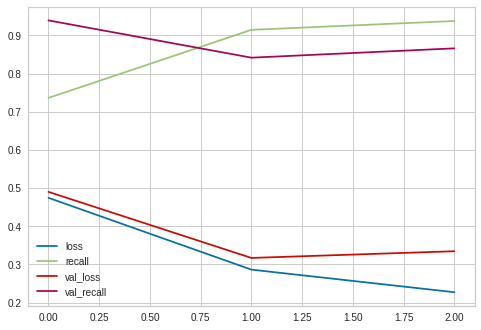

In [145]:
model_loss.plot()

In [146]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_train_pred = model.predict(X_train) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

637/637 [==============================] - 10s 15ms/step
[[12362  4323]
 [  106  3585]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.74      0.85     16685
           1       0.45      0.97      0.62      3691

    accuracy                           0.78     20376
   macro avg       0.72      0.86      0.73     20376
weighted avg       0.89      0.78      0.81     20376



In [147]:
y_pred = model.predict(X_test) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

71/71 [==============================] - 1s 15ms/step
[[1357  498]
 [  25  385]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.73      0.84      1855
           1       0.44      0.94      0.60       410

    accuracy                           0.77      2265
   macro avg       0.71      0.84      0.72      2265
weighted avg       0.88      0.77      0.79      2265



In [148]:
from sklearn.metrics import precision_recall_curve, average_precision_score


71/71 [==============================] - 1s 15ms/step


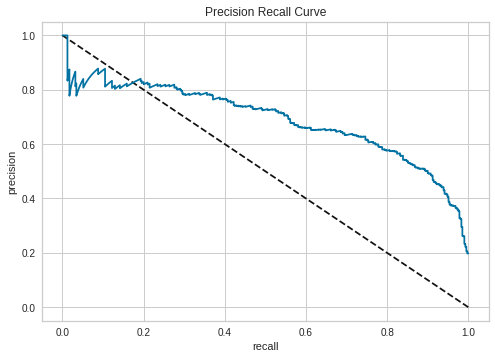

In [149]:
y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Precision Recall Curve')
plt.show()

In [150]:
average_precision_score(y_test, y_pred_proba)


0.6913138936672513

In [151]:
DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)

## BERT Modeling

In [152]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 61.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 20.6 MB/s eta 0:00:00


### Read Data

### Train test split

### Tokenization

In [153]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased") 
max_len = 0

# For every sentence...
max_token = []
for sent in X:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    
    input_ids = tokenizer.encode(sent, add_special_tokens=True)
    max_token.append(len(input_ids))                                       
    
    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Max sentence length:  162


In [ ]:
np.array(max_token).mean()

In [ ]:
sum(np.array(max_token) <= 162) / len(max_token)


In [155]:
sum(np.array(max_token) <= 162) / len(max_token)


1.0

In [156]:
def transformation(X):
  # set array dimensions
  seq_len = 162
  num_samples = len(X)

  # initialize empty zero arrays
  Xids = np.zeros((num_samples, seq_len))
  Xmask = np.zeros((num_samples, seq_len))

    
  for i, phrase in enumerate(X):
      tokens = tokenizer.encode_plus(phrase.lower(), max_length=seq_len, truncation=True,
                                      padding='max_length', add_special_tokens=True) 
      # assign tokenized outputs to respective rows in numpy arrays
      Xids[i, :] = tokens['input_ids']
      Xmask[i, :] = tokens['attention_mask']
  return Xids, Xmask

In [157]:
Xids, Xmask = transformation(X)

In [158]:
Xids.shape


(22641, 162)

In [159]:
Xmask.shape


(22641, 162)

In [160]:
labels = y.reshape(-1,1)
labels

array([[0],
       [0],
       [1],
       ...,
       [1],
       [0],
       [0]])

### Fixing token counts of all documents

### Transformation Vectors to Matrices

### Transformation Matrix to Tensorflow tensor

### Batch Size

### Creating optimization

### Creating Model

### Model Fiting

### Model evaluation

### Compare Models F1 Scores, Recall Scores and Average Precision Score

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___